# Ecommerce project -

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, you do not have real credit card numbers or emails).

##  The Dataset

You will work with the **Ecommerce_Customers** file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

**Do you need all of these details?** Think about what columns you want to include as features. The output label is the 'yearly amount spent', that you are going to predict. 

## Imports
**Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1

**Train a linear regression model to predict the yearly amount spent:**

**- Train your model using the 'LinearRegression' model from sklearn.linear_model.** 

**- Once your model is fit, you can visualize the weights using: print('Coefficients: \n', lm.coef_).**

**- Once done, you can now move to part 2 - Predicting Test data.**

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [60]:
dataFrame = pd.read_csv('Ecommerce_Customers')
dataFrame.head()
X = dataFrame.drop(['Yearly Amount Spent' , 'Address' ,'Avatar' ,'Email'],axis=1) 
y = dataFrame['Yearly Amount Spent']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

linReg = LinearRegression()
linReg.fit(X_train,y_train)
print('the coefficient is:\n', linReg.coef_)

the coefficient is:
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Part 2 - Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Predict for the test set of the data in Predictions.**

In [69]:
pred = linReg.predict(X_test)

**Create a scatterplot of the real test values versus the predicted values.**

Text(0, 0.5, 'Yearly Amount Spent')

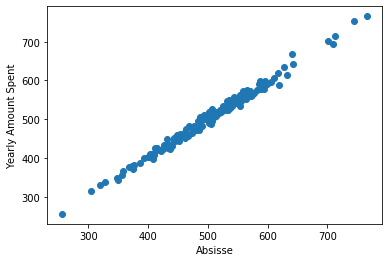

In [70]:
plt.scatter(y_test,pred)
plt.xlabel('Absisse')
plt.ylabel('Yearly Amount Spent')

## Evaluating the Model

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, so we want to minimize them.


**Use the metrics class from sklearn to calculate the the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Check the sklearn documentation for more information https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics.** 

In [71]:
from sklearn import metrics

## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

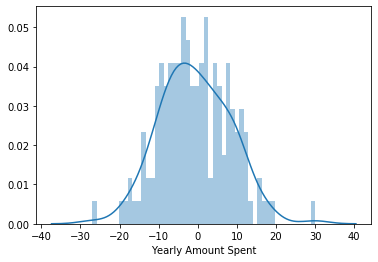

In [72]:
sns.distplot((y_test-pred),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

**Recreate the dataframe below (you might get different results).**
<img src="df.png" width=250 height=250 />

In [73]:
coeff_dataFrame = pd.DataFrame(linReg.coef_ , index = X.columns , columns =['coefficient'])
coeff_dataFrame

,coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**How can you interpret these coefficients?**

In [74]:
# Interpretation:
# Looking at this result, we can see that the time spent on the application 
# is much higher than the time spent on the website

**Do you think the company should focus more on their mobile app or on their website?**

In [75]:
# Interpretation:
# In my opinion, having a coefficient 38.59 which is higher than 0.19 means that the company must focus on using the
# application more than their webiste.

## Great Job!